In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier

import warnings


In [4]:
warnings.filterwarnings("ignore")
# getting data
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [5]:
train_df['is_train'] = 1
test_df['is_train'] = 0
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)


In [6]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  is_train     1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [7]:
combined_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_train
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [8]:
combined_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [9]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
is_train          0
dtype: int64

In [10]:
combined_df = combined_df.drop(['PassengerId', 'Cabin'], axis=1)

In [11]:
# Fill missing values
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)

combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)

combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)

# missing values
# print(train.isnull().sum())
# sns.histplot(train_df['Age'], bins=30, kde=True)

<Axes: xlabel='Sex', ylabel='count'>

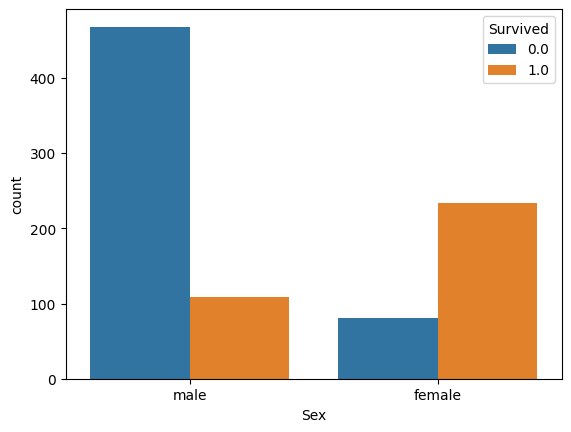

In [12]:
sns.countplot(data=combined_df, x='Sex', hue='Survived')

In [13]:
# encode Sex
le = LabelEncoder()
combined_df['Sex'] = le.fit_transform(combined_df['Sex'])


In [14]:
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined_df['Title'] = combined_df['Title'].replace(['Mlle','Ms'], 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')
combined_df['Title'] = combined_df['Title'].replace(
    ['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona','Countess','Lady','Sir'], 'Rare'
)

combined_df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [15]:
# Encode Title
title_le = LabelEncoder()
combined_df['Title'] = title_le.fit_transform(combined_df['Title'])

# Encode Embarked
embarked_le = LabelEncoder()
combined_df['Embarked'] = embarked_le.fit_transform(combined_df['Embarked'])

In [16]:
# Family features
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1
combined_df['IsAlone'] = (combined_df['FamilySize'] == 1).astype(int)
combined_df['Family_Sex'] = combined_df['FamilySize'] * combined_df['Sex']
combined_df['Age_Pclass'] = combined_df['Age'] * combined_df['Pclass']

combined_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train,Title,FamilySize,IsAlone,Family_Sex,Age_Pclass
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1,2,2,0,2,66.0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,3,2,0,0,38.0
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,1,1,0,78.0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1,3,2,0,0,35.0
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,2,1,1,1,105.0


In [17]:
# Ticket frequency
combined_df['TicketFreq'] = combined_df.groupby('Ticket')['Ticket'].transform('count')

combined_df[['Ticket', 'TicketFreq']].head()

,Ticket,TicketFreq
0,A/5 21171,1
1,PC 17599,2
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [18]:
combined_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train,Title,FamilySize,IsAlone,Family_Sex,Age_Pclass,TicketFreq
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1,2,2,0,2,66.0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,3,2,0,0,38.0,2
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,1,1,0,78.0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1,3,2,0,0,35.0,2
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,2,1,1,1,105.0,1


In [19]:
train_df = combined_df[combined_df['is_train'] == 1].copy()
test_df = combined_df[combined_df['is_train'] == 0].copy()

In [20]:
# features
features = ['Pclass','Sex','Age','Fare','Embarked','Title',
            'FamilySize','IsAlone','Family_Sex','Age_Pclass','TicketFreq']

X = train_df[features]
y = train_df['Survived']
X_test_final = test_df[features]

In [21]:
# Scaling
scaler = StandardScaler()
X_scaled = X.copy()
X_test_scaled = X_test_final.copy()

num_features = ['Age','Fare','FamilySize','Age_Pclass','TicketFreq']
X_scaled[num_features] = scaler.fit_transform(X_scaled[num_features])
X_test_scaled[num_features] = scaler.transform(X_test_scaled[num_features])

In [22]:
X_scaled.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Family_Sex,Age_Pclass,TicketFreq
0,3,1,-0.565736,-0.502445,2,2,0.059160,0,2,0.058824,-0.624404
1,1,0,0.663861,0.786845,0,3,0.059160,0,0,-0.803342,-0.067503
2,3,0,-0.258337,-0.488854,2,1,-0.560975,1,0,0.428324,-0.624404
3,1,0,0.433312,0.420730,2,3,0.059160,0,0,-0.895717,-0.067503
4,3,1,0.433312,-0.486337,2,2,-0.560975,1,1,1.259699,-0.624404


In [23]:
X_test_scaled.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Family_Sex,Age_Pclass,TicketFreq
891,3,1,0.394887,-0.490783,1,2,-0.560975,1,1,1.213512,-0.624404
892,3,0,1.355510,-0.507479,2,3,0.059160,0,0,2.368199,-0.624404
893,2,1,2.508257,-0.453367,1,2,-0.560975,1,1,1.844741,-0.624404
894,3,1,-0.181487,-0.474005,2,2,-0.560975,1,1,0.520699,-0.624404
895,3,0,-0.565736,-0.401017,2,3,0.679295,0,0,0.058824,-0.067503


In [24]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Linear SVC": LinearSVC(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(max_iter=1000),
    "SGD": SGDClassifier(max_iter=1000, tol=1e-3),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [25]:

# Cross-validation results
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
    results[name] = scores.mean()

In [26]:
# ensemble voting classifier
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=200, random_state=42)
clf3 = SVC(probability=True)

eclf = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('svc',clf3)], voting='soft')
scores = cross_val_score(eclf, X_scaled, y, cv=10, scoring='accuracy')
results["Voting Ensemble"] = scores.mean()

In [27]:
# printing Results
print(" Model Accuracies (10-fold CV) with new features")
for name, acc in results.items():
    print(f"{name:20s}: {acc:.4f}")


 Model Accuracies (10-fold CV) with new features
Logistic Regression : 0.8025
KNN                 : 0.8205
SVM                 : 0.8361
Linear SVC          : 0.7980
Random Forest       : 0.8127
Naive Bayes         : 0.8003
Perceptron          : 0.7409
SGD                 : 0.7384
Decision Tree       : 0.7835
Voting Ensemble     : 0.8350
